In [143]:
# For inline graphs
%matplotlib inline

## Imports

# pandas, numpy
import pandas as pan
import numpy as np

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# Matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Missingno
import missingno as mno

In [144]:
# Load the different files
#df_marketing = pan.DataFrame(pan.read_csv('../input/Marketing.csv', encoding="ISO-8859-1"))
#df_immatriculations = pan.DataFrame(pan.read_csv('../input/Immatriculations.csv', encoding="ISO-8859-1"))
df_clients = pan.DataFrame(pan.read_csv('../input/Clients_0.csv', encoding="ISO-8859-1"))
#df_catalogue = pan.DataFrame(pan.read_csv('../input/Catalogue.csv', encoding="ISO-8859-1"))

df_clients.dtypes

age                   object
sexe                  object
taux                  object
situationFamiliale    object
nbEnfantsAcharge      object
2eme voiture          object
immatriculation       object
dtype: object

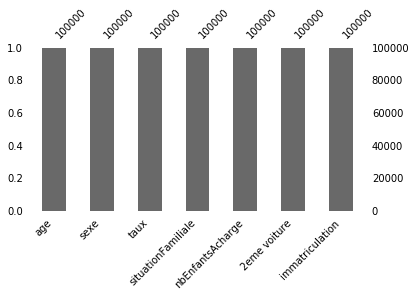

In [145]:
## Check missing data for each DF
##mno.bar(df=df_marketing, figsize=(6, 3), fontsize=10)
mno.bar(df=df_clients, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_catalogue, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_immatriculations, figsize=(6, 3), fontsize=10)

# See no NaN data in the 4 datasets, nice BUT there is : '?', 'N/D', ' ' hard written in it

In [146]:
df_clients['sexe'] = df_clients['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_clients['sexe'] = df_clients['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_clients['sexe'] = df_clients['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeClients = pan.get_dummies(df_clients['sexe'])
df_clients = pan.concat([df_clients, dfSexeClients], axis=1).drop(['sexe'] , axis=1)

df_clients.head()

,age,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme
0,44,476,En Couple,0,false,3176 TS 67,0,1
1,20,422,En Couple,2,false,3721 QS 49,0,1
2,49,221,Célibataire,0,false,9099 UV 26,1,0
3,57,246,Célibataire,0,false,3563 LA 55,0,1
4,58,1149,Célibataire,0,false,6963 AX 34,0,1


In [147]:
df_clients['situationFamiliale'] = df_clients['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeClients = pan.get_dummies(df_clients['situationFamiliale'])
df_clients = pan.concat([df_clients, dfSituationFamillialeClients], axis=1).drop(['situationFamiliale'] , axis=1)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,false,3176 TS 67,0,1,0,1,0
1,20,422,2,false,3721 QS 49,0,1,0,1,0
2,49,221,0,false,9099 UV 26,1,0,1,0,0
3,57,246,0,false,3563 LA 55,0,1,1,0,0
4,58,1149,0,false,6963 AX 34,0,1,1,0,0


In [148]:
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['true'], 1)
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['false', ' ', '?'], 0)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [149]:
df_clients['immatriculation_num'] = df_clients['immatriculation'].apply(lambda x : x.split(' ')[2]).astype(np.int64)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation_num
0,44,476,0,0,3176 TS 67,0,1,0,1,0,67
1,20,422,2,0,3721 QS 49,0,1,0,1,0,49
2,49,221,0,0,9099 UV 26,1,0,1,0,0,26
3,57,246,0,0,3563 LA 55,0,1,1,0,0,55
4,58,1149,0,0,6963 AX 34,0,1,1,0,0,34


In [150]:
df_clients['nbEnfantsAcharge'] = df_clients['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation_num
0,44,476,0,0,3176 TS 67,0,1,0,1,0,67
1,20,422,2,0,3721 QS 49,0,1,0,1,0,49
2,49,221,0,0,9099 UV 26,1,0,1,0,0,26
3,57,246,0,0,3563 LA 55,0,1,1,0,0,55
4,58,1149,0,0,6963 AX 34,0,1,1,0,0,34


In [151]:
# Little function to check if there something else than ints in the object types as ' ' or '?' etc
def checkIfInt(s):
    try: 
        int(s)
        return 
    except ValueError:
        print(s)
        return 

In [152]:
dfTauxClients = df_clients[((df_clients.taux != ' ') & (df_clients.taux != '?'))]
meanTauxClients = dfTauxClients.taux.astype(np.float64).mean()

df_clients['taux'] = df_clients['taux'].replace([' ', '?'], meanTauxClients)
df_clients['taux'] = df_clients['taux'].astype(np.float64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation_num
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0,67
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0,49
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0,26
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0,55
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0,34


In [153]:
dfAgeClients = df_clients[((df_clients.age != ' ') & (df_clients.age != '?')& (df_clients.age != '-1'))]
meanAgeClients = dfAgeClients.age.astype(np.int64).mean()

df_clients['age'] = df_clients['age'].replace([' ', '?'], meanAgeClients)
df_clients['age'] = df_clients['age'].astype(np.int64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation_num
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0,67
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0,49
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0,26
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0,55
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0,34


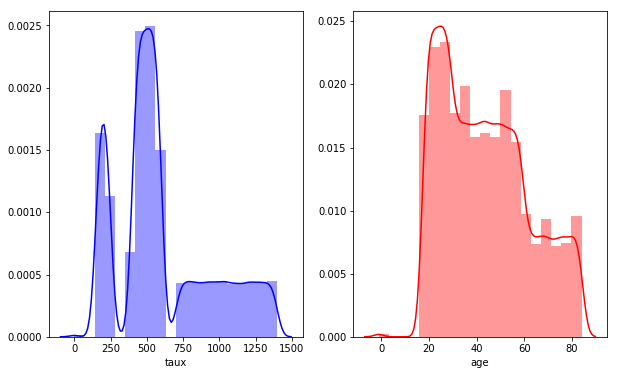

In [154]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()
sns.distplot(df_clients['taux'],bins=20,ax=ax1,color='b')
sns.distplot(df_clients['age'],bins=20,ax=ax2,color='r')
plt.show()

In [156]:
df_clients = df_clients.drop(['immatriculation'] , axis=1)
df_clients.head(5)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation_num
0,44,476.0,0,0,0,1,0,1,0,67
1,20,422.0,2,0,0,1,0,1,0,49
2,49,221.0,0,0,1,0,1,0,0,26
3,57,246.0,0,0,0,1,1,0,0,55
4,58,1149.0,0,0,0,1,1,0,0,34


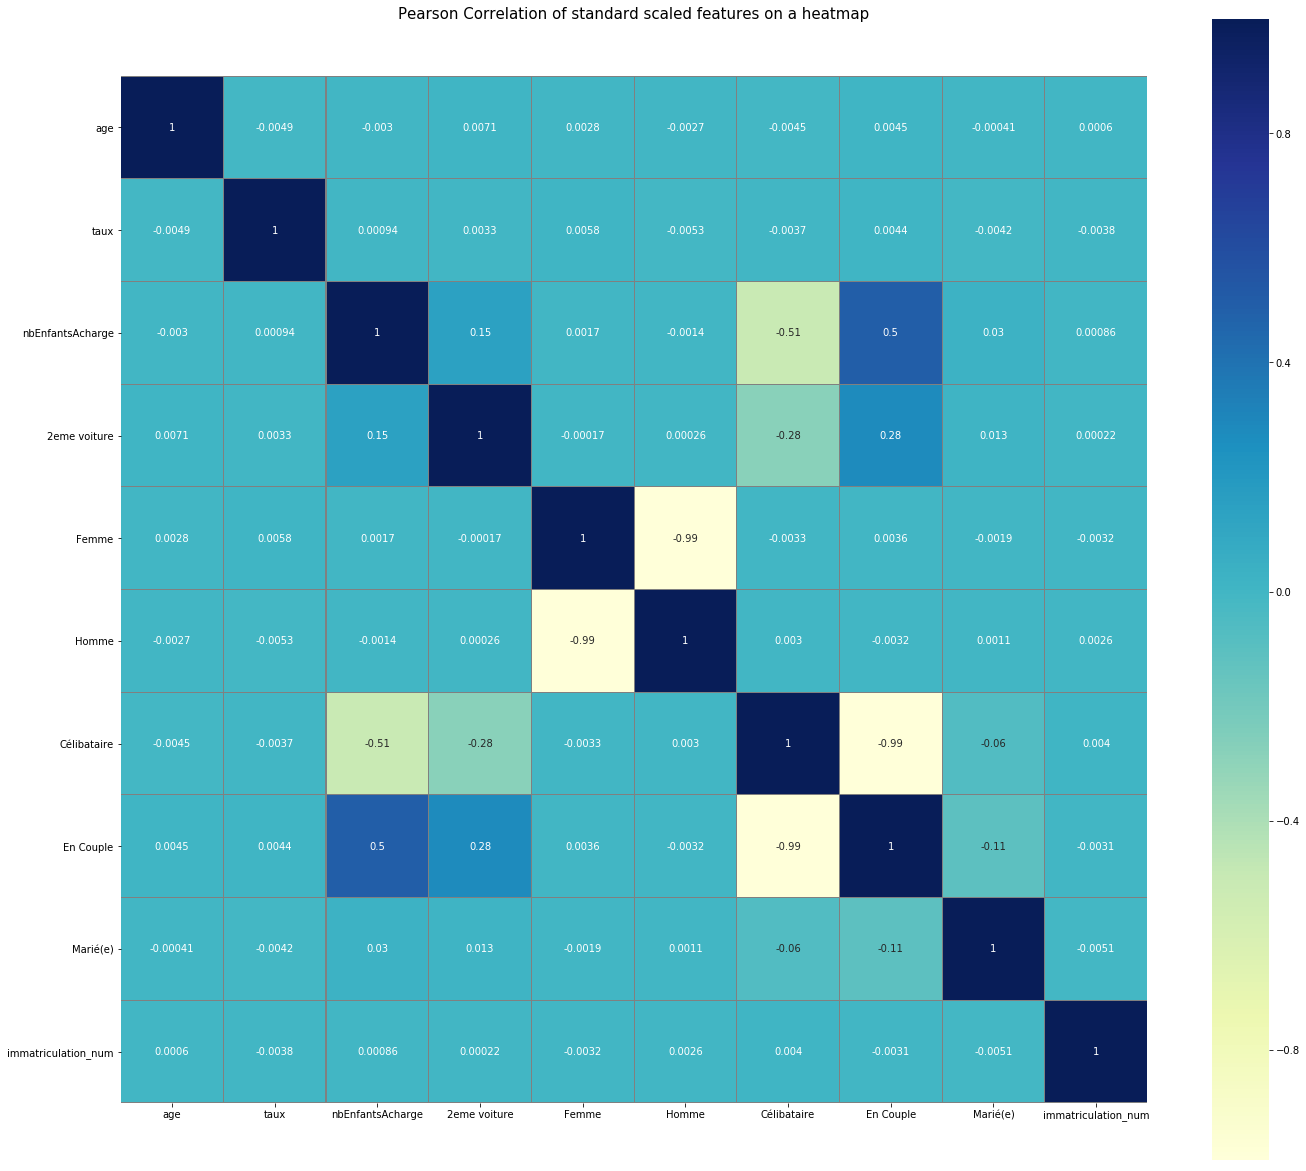

In [157]:
# Heatmap to see differents correlations between data
plt.figure(figsize=(23,21))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(df_clients.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='grey', annot=True, cmap="YlGnBu")

In [155]:
df_clients.dtypes

age                      int64
taux                   float64
nbEnfantsAcharge         int32
2eme voiture             int64
immatriculation         object
Femme                    uint8
Homme                    uint8
Célibataire              uint8
En Couple                uint8
Marié(e)                 uint8
immatriculation_num      int64
dtype: object